In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings

from IPython.core.display import display, HTML

# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.tools as tls

# configure things
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2

%matplotlib inline
sns.set()

/var/folders/cc/h8_n_8_17rl1nnws2rwz1mc80000gn/T/ipykernel_26893/3880704791.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv('understat.com.csv')
df = df.rename(index=int, columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}) 
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


<AxesSubplot:xlabel='team', ylabel='pts'>

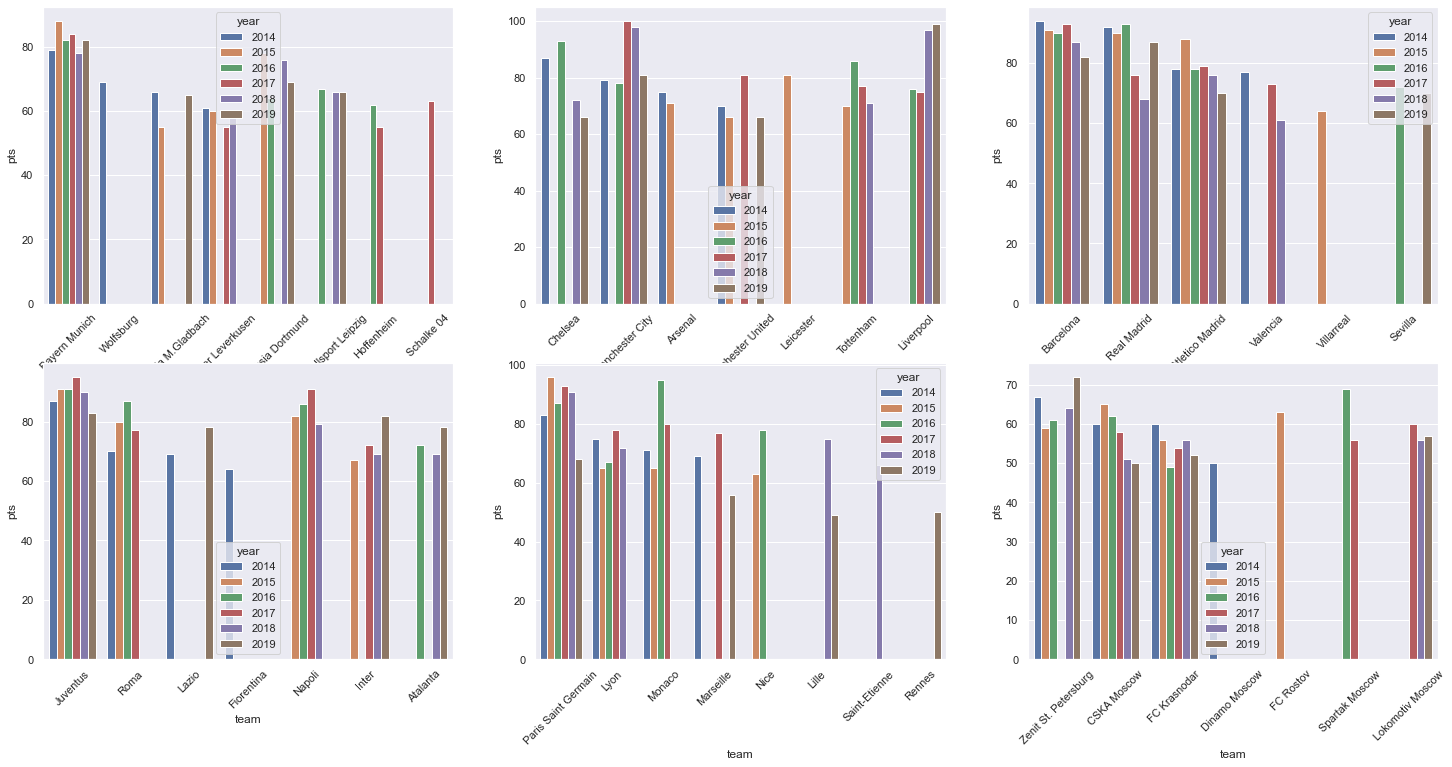

In [3]:
f = plt.figure(figsize=(25,12))
ax = f.add_subplot(2,3,1)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Bundesliga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,2)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'EPL') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,3)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'La_liga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,4)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Serie_A') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,5)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Ligue_1') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(2,3,6)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'RFPL') & (df['position'] <= 4)], ax=ax)

In [4]:
# Removing unnecessary for our analysis columns 
df_xg = df[['league', 'year', 'position', 'team', 'scored', 'xG', 'xG_diff', 'missed', 'xGA', 'xGA_diff', 'pts', 'xpts', 'xpts_diff']]

outlier_teams = ['Wolfsburg', 'Schalke 04', 'Leicester', 'Villareal', 'Sevilla', 'Lazio', 'Fiorentina', 'Lille', 'Saint-Etienne', 'FC Rostov', 'Dinamo Moscow']

In [5]:
# Checking if getting the first place requires fenomenal execution
first_place = df_xg[df_xg['position'] == 1]

# Get list of leagues
leagues = df['league'].drop_duplicates()
leagues = leagues.tolist()

# Get list of years
years = df['year'].drop_duplicates()
years = years.tolist()

# Bundesliga

In [6]:
first_place[first_place['league'] == 'Bundesliga']

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
240,Bundesliga,2014,1,Bayern Munich,80,66.21,-13.79,18,21.94,3.94,79,73.61,-5.39
258,Bundesliga,2015,1,Bayern Munich,80,77.04,-2.96,17,20.79,3.79,88,77.97,-10.03
276,Bundesliga,2016,1,Bayern Munich,89,73.91,-15.09,22,27.04,5.04,82,73.76,-8.24
294,Bundesliga,2017,1,Bayern Munich,92,76.55,-15.45,28,30.64,2.64,84,73.52,-10.48
312,Bundesliga,2018,1,Bayern Munich,88,92.24,4.24,32,27.41,-4.59,78,82.00,4.00
330,Bundesliga,2019,1,Bayern Munich,100,92.85,-7.15,32,36.47,4.47,82,77.33,-4.67


In [7]:
pts = go.Bar(x = years, y = first_place['pts'][first_place['league'] == 'Bundesliga'], name = 'PTS')
xpts = go.Bar(x = years, y = first_place['xpts'][first_place['league'] == 'Bundesliga'], name = 'Expected PTS')

data = [pts, xpts]

layout = go.Layout(
    barmode='group',
    title="Comparing Actual and Expected Points for Winner Team in Bundesliga",
    xaxis={'title': 'Year'},
    yaxis={'title': "Points",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
# and from this table we see that Bayern dominates here totally, even when they do not play well
df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'Bundesliga')].sort_values(by=['year','xpts'], ascending=False)

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
330,Bundesliga,2019,1,Bayern Munich,100,92.85,-7.15,32,36.47,4.47,82,77.33,-4.67
331,Bundesliga,2019,2,Borussia Dortmund,84,64.26,-19.74,41,42.02,1.02,69,62.48,-6.52
312,Bundesliga,2018,1,Bayern Munich,88,92.24,4.24,32,27.41,-4.59,78,82.00,4.00
313,Bundesliga,2018,2,Borussia Dortmund,81,64.99,-16.01,44,42.88,-1.12,76,62.85,-13.15
294,Bundesliga,2017,1,Bayern Munich,92,76.55,-15.45,28,30.64,2.64,84,73.52,-10.48
295,Bundesliga,2017,2,Schalke 04,53,46.83,-6.17,37,39.42,2.42,63,51.69,-11.31
276,Bundesliga,2016,1,Bayern Munich,89,73.91,-15.09,22,27.04,5.04,82,73.76,-8.24
277,Bundesliga,2016,2,RasenBallsport Leipzig,66,55.09,-10.91,39,40.06,1.06,67,59.54,-7.46
258,Bundesliga,2015,1,Bayern Munich,80,77.04,-2.96,17,20.79,3.79,88,77.97,-10.03
259,Bundesliga,2015,2,Borussia Dortmund,82,83.41,1.41,34,29.18,-4.82,78,76.58,-1.42


# La Liga 

In [9]:
first_place[first_place['league'] == 'La_liga']

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,110,102.98,-7.02,21,28.44,7.44,94,94.08,0.08
20,La_liga,2015,1,Barcelona,112,113.60,1.60,29,34.03,5.03,91,94.38,3.38
40,La_liga,2016,1,Real Madrid,106,90.87,-15.13,41,36.86,-4.14,93,86.17,-6.83
60,La_liga,2017,1,Barcelona,99,90.49,-8.51,29,41.62,12.62,93,79.44,-13.56
80,La_liga,2018,1,Barcelona,90,83.28,-6.72,36,44.93,8.93,87,73.96,-13.04
100,La_liga,2019,1,Real Madrid,70,72.16,2.16,25,33.15,8.15,87,77.69,-9.31


In [10]:
pts = go.Bar(x = years, y = first_place['pts'][first_place['league'] == 'La_liga'], name = 'PTS')
xpts = go.Bar(x = years, y = first_place['xpts'][first_place['league'] == 'La_liga'], name = 'Expected PTS')

data = [pts, xpts]

layout = go.Layout(
    barmode='group',
    title="Comparing Actual and Expected Points for Winner Team in La Liga",
    xaxis={'title': 'Year'},
    yaxis={'title': "Points",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [11]:
# comparing with runner-up
df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'La_liga')].sort_values(by=['year','xpts'], ascending=False)

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
100,La_liga,2019,1,Real Madrid,70,72.16,2.16,25,33.15,8.15,87,77.69,-9.31
101,La_liga,2019,2,Barcelona,86,72.01,-13.99,38,37.82,-0.18,82,73.14,-8.86
80,La_liga,2018,1,Barcelona,90,83.28,-6.72,36,44.93,8.93,87,73.96,-13.04
81,La_liga,2018,2,Atletico Madrid,55,51.87,-3.13,29,41.43,12.43,76,59.43,-16.57
60,La_liga,2017,1,Barcelona,99,90.49,-8.51,29,41.62,12.62,93,79.44,-13.56
61,La_liga,2017,2,Atletico Madrid,58,50.29,-7.71,22,35.48,13.48,79,61.60,-17.40
41,La_liga,2016,2,Barcelona,116,93.55,-22.45,37,31.32,-5.68,90,87.95,-2.05
40,La_liga,2016,1,Real Madrid,106,90.87,-15.13,41,36.86,-4.14,93,86.17,-6.83
20,La_liga,2015,1,Barcelona,112,113.60,1.60,29,34.03,5.03,91,94.38,3.38
21,La_liga,2015,2,Real Madrid,110,90.45,-19.55,34,45.23,11.23,90,79.09,-10.91


# Premier League

In [12]:
first_place[first_place['league'] == 'EPL']

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
120,EPL,2014,1,Chelsea,73,68.64,-4.36,32,31.52,-0.48,87,75.32,-11.68
140,EPL,2015,1,Leicester,68,68.42,0.42,36,45.02,9.02,81,68.94,-12.06
160,EPL,2016,1,Chelsea,85,61.80,-23.20,33,28.62,-4.38,93,75.74,-17.26
180,EPL,2017,1,Manchester City,106,91.43,-14.57,27,24.51,-2.49,100,91.09,-8.91
200,EPL,2018,1,Manchester City,95,93.72,-1.28,23,25.73,2.73,98,90.64,-7.36
220,EPL,2019,1,Liverpool,85,75.19,-9.81,33,39.57,6.57,99,74.28,-24.72


In [13]:
pts = go.Bar(x = years, y = first_place['pts'][first_place['league'] == 'EPL'], name = 'PTS')
xpts = go.Bar(x = years, y = first_place['xpts'][first_place['league'] == 'EPL'], name = 'Expected PTS')

data = [pts, xpts]

layout = go.Layout(
    barmode='group',
    title="Comparing Actual and Expected Points for Winner Team in EPL",
    xaxis={'title': 'Year'},
    yaxis={'title': "Points",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
# comparing with runner-ups
df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'EPL')].sort_values(by=['year','xpts'], ascending=False)

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
221,EPL,2019,2,Manchester City,102,102.21,0.21,35,37.00,2.00,81,86.76,5.76
220,EPL,2019,1,Liverpool,85,75.19,-9.81,33,39.57,6.57,99,74.28,-24.72
200,EPL,2018,1,Manchester City,95,93.72,-1.28,23,25.73,2.73,98,90.64,-7.36
201,EPL,2018,2,Liverpool,89,79.46,-9.54,22,29.15,7.15,97,83.45,-13.55
180,EPL,2017,1,Manchester City,106,91.43,-14.57,27,24.51,-2.49,100,91.09,-8.91
181,EPL,2017,2,Manchester United,68,59.04,-8.96,28,43.54,15.54,81,62.33,-18.67
160,EPL,2016,1,Chelsea,85,61.80,-23.20,33,28.62,-4.38,93,75.74,-17.26
161,EPL,2016,2,Tottenham,86,70.07,-15.93,26,33.78,7.78,86,75.37,-10.63
141,EPL,2015,2,Arsenal,65,73.53,8.53,36,33.86,-2.14,71,77.01,6.01
140,EPL,2015,1,Leicester,68,68.42,0.42,36,45.02,9.02,81,68.94,-12.06


# Ligue 1

In [15]:
first_place[first_place['league'] == 'Ligue_1']

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
468,Ligue_1,2014,1,Paris Saint Germain,83,78.42,-4.58,36,28.24,-7.76,83,84.10,1.10
488,Ligue_1,2015,1,Paris Saint Germain,102,86.20,-15.80,19,24.37,5.37,96,90.27,-5.73
508,Ligue_1,2016,1,Monaco,107,76.04,-30.96,31,34.89,3.89,95,78.06,-16.94
528,Ligue_1,2017,1,Paris Saint Germain,108,89.92,-18.08,29,32.10,3.10,93,84.61,-8.39
548,Ligue_1,2018,1,Paris Saint Germain,105,95.34,-9.66,35,36.78,1.78,91,86.04,-4.96
568,Ligue_1,2019,1,Paris Saint Germain,75,76.42,1.42,24,22.43,-1.57,68,65.68,-2.32


In [16]:
pts = go.Bar(x = years, y = first_place['pts'][first_place['league'] == 'Ligue_1'], name = 'PTS')
xpts = go.Bar(x = years, y = first_place['xpts'][first_place['league'] == 'Ligue_1'], name = 'Expected PTS')

data = [pts, xpts]

layout = go.Layout(
    barmode='group',
    title="Comparing Actual and Expected Points for Winner Team in Ligue 1",
    xaxis={'title': 'Year'},
    yaxis={'title': "Points",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [17]:
# comparing with runner-ups
df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'Ligue_1')].sort_values(by=['year','xpts'], ascending=False)

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
568,Ligue_1,2019,1,Paris Saint Germain,75,76.42,1.42,24,22.43,-1.57,68,65.68,-2.32
569,Ligue_1,2019,2,Marseille,41,36.42,-4.58,29,32.05,3.05,56,41.73,-14.27
548,Ligue_1,2018,1,Paris Saint Germain,105,95.34,-9.66,35,36.78,1.78,91,86.04,-4.96
549,Ligue_1,2018,2,Lille,68,60.01,-7.99,33,39.85,6.85,75,67.02,-7.98
528,Ligue_1,2017,1,Paris Saint Germain,108,89.92,-18.08,29,32.10,3.10,93,84.61,-8.39
529,Ligue_1,2017,2,Monaco,85,62.41,-22.59,45,45.27,0.27,80,65.15,-14.85
509,Ligue_1,2016,2,Paris Saint Germain,83,82.16,-0.84,27,24.25,-2.75,87,87.22,0.22
508,Ligue_1,2016,1,Monaco,107,76.04,-30.96,31,34.89,3.89,95,78.06,-16.94
488,Ligue_1,2015,1,Paris Saint Germain,102,86.20,-15.80,19,24.37,5.37,96,90.27,-5.73
489,Ligue_1,2015,2,Lyon,67,63.01,-3.99,43,38.01,-4.99,65,68.69,3.69


# Serie A

In [18]:
first_place[first_place['league'] == 'Serie_A']

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
348,Serie_A,2014,1,Juventus,72,59.08,-12.92,24,29.13,5.13,87,74.79,-12.21
368,Serie_A,2015,1,Juventus,75,62.99,-12.01,20,23.00,3.00,91,78.74,-12.26
388,Serie_A,2016,1,Juventus,77,68.74,-8.26,27,23.60,-3.40,91,82.86,-8.14
408,Serie_A,2017,1,Juventus,86,59.23,-26.77,24,28.58,4.58,95,73.51,-21.49
428,Serie_A,2018,1,Juventus,70,64.53,-5.47,30,35.03,5.03,90,70.93,-19.07
448,Serie_A,2019,1,Juventus,76,73.77,-2.23,43,41.00,-2.00,83,71.24,-11.76


In [19]:
pts = go.Bar(x = years, y = first_place['pts'][first_place['league'] == 'Serie_A'], name = 'PTS')
xpts = go.Bar(x = years, y = first_place['xpts'][first_place['league'] == 'Serie_A'], name = 'Expecetd PTS')

data = [pts, xpts]

layout = go.Layout(
    barmode='group',
    title="Comparing Actual and Expected Points for Winner Team in Serie A",
    xaxis={'title': 'Year'},
    yaxis={'title': "Points",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
# comparing to runner-ups
df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'Serie_A')].sort_values(by=['year','xpts'], ascending=False)

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
449,Serie_A,2019,2,Inter,81,73.95,-7.05,36,39.36,3.36,82,75.38,-6.62
448,Serie_A,2019,1,Juventus,76,73.77,-2.23,43,41.00,-2.00,83,71.24,-11.76
429,Serie_A,2018,2,Napoli,74,68.24,-5.76,36,36.50,0.50,79,74.45,-4.55
428,Serie_A,2018,1,Juventus,70,64.53,-5.47,30,35.03,5.03,90,70.93,-19.07
409,Serie_A,2017,2,Napoli,77,70.45,-6.55,29,25.27,-3.73,91,82.23,-8.77
408,Serie_A,2017,1,Juventus,86,59.23,-26.77,24,28.58,4.58,95,73.51,-21.49
388,Serie_A,2016,1,Juventus,77,68.74,-8.26,27,23.60,-3.40,91,82.86,-8.14
389,Serie_A,2016,2,Roma,90,83.00,-7.00,38,41.08,3.08,87,77.39,-9.61
369,Serie_A,2015,2,Napoli,80,69.53,-10.47,32,26.69,-5.31,82,79.07,-2.93
368,Serie_A,2015,1,Juventus,75,62.99,-12.01,20,23.00,3.00,91,78.74,-12.26


# Statistical Overview

In [21]:
# Creating separate DataFrames per each league
laliga = df_xg[df_xg['league'] == 'La_liga']
laliga.reset_index(inplace=True)
epl = df_xg[df_xg['league'] == 'EPL']
epl.reset_index(inplace=True)
bundesliga = df_xg[df_xg['league'] == 'Bundesliga']
bundesliga.reset_index(inplace=True)
seriea = df_xg[df_xg['league'] == 'Serie_A']
seriea.reset_index(inplace=True)
ligue1 = df_xg[df_xg['league'] == 'Ligue_1']
ligue1.reset_index(inplace=True)

In [22]:
laliga.describe()

,index,year,position,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
count,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00
mean,59.50,"2,016.50",10.50,50.99,50.59,-0.40,50.99,50.59,-0.40,52.23,52.44,0.21
std,34.79,1.71,5.79,19.41,15.70,7.75,13.94,10.06,7.96,17.75,13.48,7.65
min,0.00,"2,014.00",1.00,22.00,29.56,-22.45,18.00,27.80,-29.18,20.00,26.50,-17.40
25%,29.75,"2,015.00",5.75,40.00,40.49,-5.13,42.75,44.07,-6.20,40.50,42.82,-5.01
50%,59.50,"2,016.50",10.50,46.00,47.13,1.13,51.00,50.64,-0.07,49.00,50.45,0.61
75%,89.25,"2,018.00",15.25,56.00,54.96,4.65,61.00,57.75,6.04,60.25,58.33,5.14
max,119.00,"2,019.00",20.00,118.00,113.60,13.88,94.00,78.86,14.42,94.00,94.38,20.16


In [23]:
def print_records_antirecords(df):
  print('Presenting some records and antirecords: \n')
  for col in df.describe().columns:
    if col not in ['index', 'year', 'position']:
      team_min = df['team'].loc[df[col] == df.describe().loc['min',col]].values[0]
      year_min = df['year'].loc[df[col] == df.describe().loc['min',col]].values[0]
      team_max = df['team'].loc[df[col] == df.describe().loc['max',col]].values[0]
      year_max = df['year'].loc[df[col] == df.describe().loc['max',col]].values[0]
      val_min = df.describe().loc['min',col]
      val_max = df.describe().loc['max',col]
      print('The lowest value of {0} had {1} in {2} and it is equal to {3:.2f}'.format(col.upper(), team_min, year_min, val_min))
      print('The highest value of {0} had {1} in {2} and it is equal to {3:.2f}'.format(col.upper(), team_max, year_max, val_max))
      print('='*100)
      

print_records_antirecords(laliga)

Presenting some records and antirecords: 

The lowest value of SCORED had Cordoba in 2014 and it is equal to 22.00
The highest value of SCORED had Real Madrid in 2014 and it is equal to 118.00
The lowest value of XG had Eibar in 2014 and it is equal to 29.56
The highest value of XG had Barcelona in 2015 and it is equal to 113.60
The lowest value of XG_DIFF had Barcelona in 2016 and it is equal to -22.45
The highest value of XG_DIFF had Las Palmas in 2017 and it is equal to 13.88
The lowest value of MISSED had Atletico Madrid in 2015 and it is equal to 18.00
The highest value of MISSED had Osasuna in 2016 and it is equal to 94.00
The lowest value of XGA had Atletico Madrid in 2015 and it is equal to 27.80
The highest value of XGA had Levante in 2018 and it is equal to 78.86
The lowest value of XGA_DIFF had Osasuna in 2016 and it is equal to -29.18
The highest value of XGA_DIFF had Athletic Club in 2019 and it is equal to 14.42
The lowest value of PTS had Cordoba in 2014 and it is equal 

In [24]:
trace0 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2014], 
    y = laliga['xG_diff'][laliga['year'] == 2014],
    name = '2014',
    mode = 'lines+markers'
)

trace1 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2015], 
    y = laliga['xG_diff'][laliga['year'] == 2015],
    name='2015',
    mode = 'lines+markers'
)

trace2 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2016], 
    y = laliga['xG_diff'][laliga['year'] == 2016],
    name='2016',
    mode = 'lines+markers'
)

trace3 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2017], 
    y = laliga['xG_diff'][laliga['year'] == 2017],
    name='2017',
    mode = 'lines+markers'
)

trace4 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2018], 
    y = laliga['xG_diff'][laliga['year'] == 2018],
    name='2018',
    mode = 'lines+markers'
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title="Comparing xG gap between positions",
    xaxis={'title': 'Year'},
    yaxis={'title': "xG difference",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [25]:
trace0 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2014], 
    y = laliga['xGA_diff'][laliga['year'] == 2014],
    name = '2014',
    mode = 'lines+markers'
)

trace1 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2015], 
    y = laliga['xGA_diff'][laliga['year'] == 2015],
    name='2015',
    mode = 'lines+markers'
)

trace2 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2016], 
    y = laliga['xGA_diff'][laliga['year'] == 2016],
    name='2016',
    mode = 'lines+markers'
)

trace3 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2017], 
    y = laliga['xGA_diff'][laliga['year'] == 2017],
    name='2017',
    mode = 'lines+markers'
)

trace4 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2018], 
    y = laliga['xGA_diff'][laliga['year'] == 2018],
    name='2018',
    mode = 'lines+markers'
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title="Comparing xGA gap between positions",
    xaxis={'title': 'Year'},
    yaxis={'title': "xGA difference",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [26]:
trace0 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2014], 
    y = laliga['xpts_diff'][laliga['year'] == 2014],
    name = '2014',
    mode = 'lines+markers'
)

trace1 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2015], 
    y = laliga['xpts_diff'][laliga['year'] == 2015],
    name='2015',
    mode = 'lines+markers'
)

trace2 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2016], 
    y = laliga['xpts_diff'][laliga['year'] == 2016],
    name='2016',
    mode = 'lines+markers'
)

trace3 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2017], 
    y = laliga['xpts_diff'][laliga['year'] == 2017],
    name='2017',
    mode = 'lines+markers'
)

trace4 = go.Scatter(
    x = laliga['position'][laliga['year'] == 2018], 
    y = laliga['xpts_diff'][laliga['year'] == 2018],
    name='2018',
    mode = 'lines+markers'
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title="Comparing xPTS gap between positions",
    xaxis={'title': 'Position'},
    yaxis={'title': "xPTS difference",
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
# Check mean differences
def get_diff_means(df):  
  dm = df.groupby('year')[['xG_diff', 'xGA_diff', 'xpts_diff']].mean()
  
  return dm

means = get_diff_means(laliga)
means

,xG_diff,xGA_diff,xpts_diff
year,,,
2014,-0.69,-0.69,0.12
2015,0.32,0.32,0.27
2016,-8.29,-8.29,-0.21
2017,1.07,1.07,-0.22
2018,3.64,3.64,0.81
2019,1.54,1.54,0.52


In [28]:
# Check median differences
def get_diff_medians(df):  
  dm = df.groupby('year')[['xG_diff', 'xGA_diff', 'xpts_diff']].median()
  
  return dm

medians = get_diff_medians(laliga)
medians

,xG_diff,xGA_diff,xpts_diff
year,,,
2014,1.55,0.11,0.34
2015,1.91,-0.67,2.17
2016,-7.75,-8.29,-2.13
2017,-0.56,0.76,0.22
2018,4.95,2.50,0.96
2019,2.31,-0.29,0.35


# Outliers Detection

In [29]:
# Getting outliers for xG using zscore
from scipy.stats import zscore
# laliga[(np.abs(zscore(laliga[['xG_diff']])) > 2.0).all(axis=1)]
df_xg[(np.abs(zscore(df_xg[['xG_diff']])) > 3.0).all(axis=1)]

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
1,La_liga,2014,2,Real Madrid,118,95.77,-22.23,38,42.61,4.61,92,81.75,-10.25
41,La_liga,2016,2,Barcelona,116,93.55,-22.45,37,31.32,-5.68,90,87.95,-2.05
160,EPL,2016,1,Chelsea,85,61.80,-23.20,33,28.62,-4.38,93,75.74,-17.26
408,Serie_A,2017,1,Juventus,86,59.23,-26.77,24,28.58,4.58,95,73.51,-21.49
412,Serie_A,2017,5,Lazio,89,66.51,-22.49,49,42.57,-6.43,72,66.05,-5.95
508,Ligue_1,2016,1,Monaco,107,76.04,-30.96,31,34.89,3.89,95,78.06,-16.94
529,Ligue_1,2017,2,Monaco,85,62.41,-22.59,45,45.27,0.27,80,65.15,-14.85
530,Ligue_1,2017,3,Lyon,87,65.27,-21.73,43,37.09,-5.91,78,70.04,-7.96


In [30]:
# outliers for xGA
# laliga[(np.abs(zscore(laliga[['xGA_diff']])) > 2.0).all(axis=1)]
df_xg[(np.abs(zscore(df_xg[['xGA_diff']])) > 3.0).all(axis=1)]

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
58,La_liga,2016,19,Osasuna,40,33.13,-6.87,94,64.82,-29.18,22,31.64,9.64


In [31]:
# Outliers for xPTS
# laliga[(np.abs(zscore(laliga[['xpts_diff']])) > 2.0).all(axis=1)]
df_xg[(np.abs(zscore(df_xg[['xpts_diff']])) > 3.0).all(axis=1)]

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
220,EPL,2019,1,Liverpool,85,75.19,-9.81,33,39.57,6.57,99,74.28,-24.72
407,Serie_A,2016,20,Pescara,35,43.12,8.12,83,68.41,-14.59,15,38.05,23.05
408,Serie_A,2017,1,Juventus,86,59.23,-26.77,24,28.58,4.58,95,73.51,-21.49
510,Ligue_1,2016,3,Nice,63,51.54,-11.46,36,50.89,14.89,78,53.47,-24.53
620,RFPL,2016,1,Spartak Moscow,46,35.68,-10.32,27,30.31,3.31,69,45.00,-24.00


# IQR

In [32]:
# Trying different method of outliers detection
df_xg.describe()

,year,position,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
count,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00
mean,"2,016.50",10.06,48.19,47.06,-1.13,48.19,47.06,-1.13,49.37,49.54,0.17
std,1.71,5.58,17.61,14.60,6.85,13.87,11.78,6.66,16.96,13.56,7.16
min,"2,014.00",1.00,13.00,15.06,-30.96,15.00,16.84,-29.18,13.00,17.91,-24.72
25%,"2,015.00",5.00,36.00,37.13,-4.99,38.00,38.92,-5.70,38.00,39.47,-4.50
50%,"2,016.50",10.00,45.00,44.71,-0.61,48.00,47.31,-0.92,46.00,47.10,0.12
75%,"2,018.00",15.00,56.00,53.86,3.59,58.00,54.83,3.38,59.25,56.94,4.91
max,"2,019.00",20.00,118.00,113.60,18.15,94.00,88.43,16.37,100.00,94.38,23.05


In [33]:
# using Interquartile Range Method to identify outliers
# xG_diff
iqr_xG = (df_xg.describe().loc['75%','xG_diff'] - df_xg.describe().loc['25%','xG_diff']) * 1.5
upper_xG = df_xg.describe().loc['75%','xG_diff'] + iqr_xG
lower_xG = df_xg.describe().loc['25%','xG_diff'] - iqr_xG

print('IQR for xG_diff: {:.2f}'.format(iqr_xG))
print('Upper border for xG_diff: {:.2f}'.format(upper_xG))
print('Lower border for xG_diff: {:.2f}'.format(lower_xG))

outliers_xG = df_xg[(df_xg['xG_diff'] > upper_xG) | (df_xg['xG_diff'] < lower_xG)]
print('='*50)

# xGA_diff
iqr_xGA = (df_xg.describe().loc['75%','xGA_diff'] - df_xg.describe().loc['25%','xGA_diff']) * 1.5
upper_xGA = df_xg.describe().loc['75%','xGA_diff'] + iqr_xGA
lower_xGA = df_xg.describe().loc['25%','xGA_diff'] - iqr_xGA

print('IQR for xGA_diff: {:.2f}'.format(iqr_xGA))
print('Upper border for xGA_diff: {:.2f}'.format(upper_xGA))
print('Lower border for xGA_diff: {:.2f}'.format(lower_xGA))

outliers_xGA = df_xg[(df_xg['xGA_diff'] > upper_xGA) | (df_xg['xGA_diff'] < lower_xGA)]
print('='*50)

# xpts_diff
iqr_xpts = (df_xg.describe().loc['75%','xpts_diff'] - df_xg.describe().loc['25%','xpts_diff']) * 1.5
upper_xpts = df_xg.describe().loc['75%','xpts_diff'] + iqr_xpts
lower_xpts = df_xg.describe().loc['25%','xpts_diff'] - iqr_xpts

print('IQR for xPTS_diff: {:.2f}'.format(iqr_xpts))
print('Upper border for xPTS_diff: {:.2f}'.format(upper_xpts))
print('Lower border for xPTS_diff: {:.2f}'.format(lower_xpts))

outliers_xpts = df_xg[(df_xg['xpts_diff'] > upper_xpts) | (df_xg['xpts_diff'] < lower_xpts)]
print('='*50)

outliers_full = pd.concat([outliers_xG, outliers_xGA, outliers_xpts])
outliers_full = outliers_full.drop_duplicates()

IQR for xG_diff: 12.86
Upper border for xG_diff: 16.45
Lower border for xG_diff: -17.84
IQR for xGA_diff: 13.62
Upper border for xGA_diff: 17.00
Lower border for xGA_diff: -19.32
IQR for xPTS_diff: 14.12
Upper border for xPTS_diff: 19.03
Lower border for xPTS_diff: -18.62


In [34]:
# Adding ratings bottom to up to find looser in each league (different amount of teams in every league so I can't do just n-20)
max_position = df_xg.groupby('league')['position'].max()
df_xg['position_reverse'] = np.nan
outliers_full['position_reverse'] = np.nan

for i, row in df_xg.iterrows():
  df_xg.at[i, 'position_reverse'] = np.abs(row['position'] - max_position[row['league']])+1
  
for i, row in outliers_full.iterrows():
  outliers_full.at[i, 'position_reverse'] = np.abs(row['position'] - max_position[row['league']])+1

In [35]:
total_count = df_xg[(df_xg['position'] <= 4) | (df_xg['position_reverse'] <= 3)].count()[0]
outlier_count = outliers_full[(outliers_full['position'] <= 4) | (outliers_full['position_reverse'] <= 3)].count()[0]
outlier_prob = outlier_count / total_count
print('Probability of outlier in top or bottom of the final table: {:.2%}'.format(outlier_prob))

Probability of outlier in top or bottom of the final table: 7.94%


<AxesSubplot:xlabel='league', ylabel='outliers'>

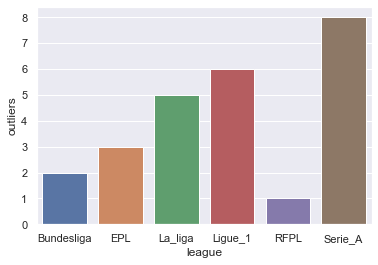

In [36]:
# 1-3 outliers among all leagues in a year
data = pd.DataFrame(outliers_full.groupby('league')['year'].count()).reset_index()
data = data.rename(index=int, columns={'year': 'outliers'})
sns.barplot(x='league', y='outliers', data=data)
# no outliers in Bundesliga

In [37]:
top_bottom = outliers_full[(outliers_full['position'] <= 4) | (outliers_full['position_reverse'] <= 3)].sort_values(by='league')
top_bottom

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff,position_reverse
331,Bundesliga,2019,2,Borussia Dortmund,84,64.26,-19.74,41,42.02,1.02,69,62.48,-6.52,17.00
160,EPL,2016,1,Chelsea,85,61.80,-23.20,33,28.62,-4.38,93,75.74,-17.26,20.00
220,EPL,2019,1,Liverpool,85,75.19,-9.81,33,39.57,6.57,99,74.28,-24.72,20.00
181,EPL,2017,2,Manchester United,68,59.04,-8.96,28,43.54,15.54,81,62.33,-18.67,19.00
1,La_liga,2014,2,Real Madrid,118,95.77,-22.23,38,42.61,4.61,92,81.75,-10.25,19.00
21,La_liga,2015,2,Real Madrid,110,90.45,-19.55,34,45.23,11.23,90,79.09,-10.91,19.00
41,La_liga,2016,2,Barcelona,116,93.55,-22.45,37,31.32,-5.68,90,87.95,-2.05,19.00
77,La_liga,2017,18,Deportivo La Coruna,38,49.78,11.78,76,60.87,-15.13,29,49.16,20.16,3.00
58,La_liga,2016,19,Osasuna,40,33.13,-6.87,94,64.82,-29.18,22,31.64,9.64,2.00
530,Ligue_1,2017,3,Lyon,87,65.27,-21.73,43,37.09,-5.91,78,70.04,-7.96,18.00


In [38]:
# Let's get back to our list of teams that suddenly got into top. Was that because of unbeliavable mix of luck and skill?
ot = [x for x  in outlier_teams if x in top_bottom['team'].drop_duplicates().tolist()]
ot
# The answer is absolutely no. They just played well during 1 season. Sometimes that happen.

[]